In [ ]:
from numpy.random import randint
from numpy.random import rand
import matplotlib.pyplot as plt


import numpy as np
import timeit
import random
import math
import time

from numpy.random import randn
from numpy.random import seed
from numpy import asarray


from numpy import exp
from numpy import sqrt
from numpy import cos
from numpy import e
from numpy import pi


In [ ]:

num = 100
nodes=genNodes(num)

def trans_a_matriz(arreglo):
  transformada = [int(x) for x in arreglo.split()]
  matriz = [x.tolist() for x in  np.array_split(np.array(transformada),25)]
  return matriz

  
dist = """
0 1 2 3 4 1 2 3 4 5 2 3 4 5 6 3 4 5 6 7 4 5 6 7 8
1 0 1 2 3 2 1 2 3 4 3 2 3 4 5 4 3 4 5 6 5 4 5 6 7
2 1 0 1 2 3 2 1 2 3 4 3 2 3 4 5 4 3 4 5 6 5 4 5 6
3 2 1 0 1 4 3 2 1 2 5 4 3 2 3 6 5 4 3 4 7 6 5 4 5
4 3 2 1 0 5 4 3 2 1 6 5 4 3 2 7 6 5 4 3 8 7 6 5 4
1 2 3 4 5 0 1 2 3 4 1 2 3 4 5 2 3 4 5 6 3 4 5 6 7
2 1 2 3 4 1 0 1 2 3 2 1 2 3 4 3 2 3 4 5 4 3 4 5 6
3 2 1 2 3 2 1 0 1 2 3 2 1 2 3 4 3 2 3 4 5 4 3 4 5
4 3 2 1 2 3 2 1 0 1 4 3 2 1 2 5 4 3 2 3 6 5 4 3 4
5 4 3 2 1 4 3 2 1 0 5 4 3 2 1 6 5 4 3 2 7 6 5 4 3
2 3 4 5 6 1 2 3 4 5 0 1 2 3 4 1 2 3 4 5 2 3 4 5 6
3 2 3 4 5 2 1 2 3 4 1 0 1 2 3 2 1 2 3 4 3 2 3 4 5
4 3 2 3 4 3 2 1 2 3 2 1 0 1 2 3 2 1 2 3 4 3 2 3 4
5 4 3 2 3 4 3 2 1 2 3 2 1 0 1 4 3 2 1 2 5 4 3 2 3
6 5 4 3 2 5 4 3 2 1 4 3 2 1 0 5 4 3 2 1 6 5 4 3 2
3 4 5 6 7 2 3 4 5 6 1 2 3 4 5 0 1 2 3 4 1 2 3 4 5
4 3 4 5 6 3 2 3 4 5 2 1 2 3 4 1 0 1 2 3 2 1 2 3 4
5 4 3 4 5 4 3 2 3 4 3 2 1 2 3 2 1 0 1 2 3 2 1 2 3
6 5 4 3 4 5 4 3 2 3 4 3 2 1 2 3 2 1 0 1 4 3 2 1 2
7 6 5 4 3 6 5 4 3 2 5 4 3 2 1 4 3 2 1 0 5 4 3 2 1
4 5 6 7 8 3 4 5 6 7 2 3 4 5 6 1 2 3 4 5 0 1 2 3 4
5 4 5 6 7 4 3 4 5 6 3 2 3 4 5 2 1 2 3 4 1 0 1 2 3
6 5 4 5 6 5 4 3 4 5 4 3 2 3 4 3 2 1 2 3 2 1 0 1 2
7 6 5 4 5 6 5 4 3 4 5 4 3 2 3 4 3 2 1 2 3 2 1 0 1
8 7 6 5 4 7 6 5 4 3 6 5 4 3 2 5 4 3 2 1 4 3 2 1 0
"""
matriz_dist=trans_a_matriz(dist)
flujo="""
0  3  2  0  0 10  5  0  5  2  0  0  2  0  5  3  0  1 10  0  2  1  1  1  0
 3  0  4  0 10  0  0  2  2  1  5  0  0  0  0  0  1  6  1  0  2  2  5  1 10
 2  4  0  3  4  5  5  5  1  4  0  4  0  4  0  3  2  5  5  2  0  0  3  1  0
 0  0  3  0  0  0  2  2  0  6  2  5  2  5  1  1  1  2  2  4  2  0  2  2  5
 0 10  4  0  0  2  0  0  0  0  0  0  0  0  2  0  0  2  0  5  0  2  1  0  2
10  0  5  0  2  0 10 10  5 10  6  0  0 10  2 10  1  5  5  2  5  0  2  0  1
 5  0  5  2  0 10  0  1  3  5  0  0  2  4  5 10  6  0  5  5  5  0  5  5  0
 0  2  5  2  0 10  1  0 10  2  5  2  0  3  0  0  0  4  0  5  0  5  2  2  5
 5  2  1  0  0  5  3 10  0  5  6  0  1  5  5  5  2  3  5  0  2 10 10  1  5
 2  1  4  6  0 10  5  2  5  0  0  1  2  1  0  0  0  0  6  6  4  5  3  2  2
 0  5  0  2  0  6  0  5  6  0  0  2  0  4  2  1  0  6  2  1  5  0  0  1  5
 0  0  4  5  0  0  0  2  0  1  2  0  2  1  0  3 10  0  0  4  0  0  4  2  5
 2  0  0  2  0  0  2  0  1  2  0  2  0  4  5  0  1  0  5  0  0  0  5  1  1
 0  0  4  5  0 10  4  3  5  1  4  1  4  0  0  0  2  2  0  2  5  0  5  2  5
 5  0  0  1  2  2  5  0  5  0  2  0  5  0  0  2  0  0  0  6  3  5  0  0  5
 3  0  3  1  0 10 10  0  5  0  1  3  0  0  2  0  0  5  5  1  5  2  1  2 10
 0  1  2  1  0  1  6  0  2  0  0 10  1  2  0  0  0  5  2  1  1  5  6  5  5
 1  6  5  2  2  5  0  4  3  0  6  0  0  2  0  5  5  0  4  0  0  0  0  5  0
10  1  5  2  0  5  5  0  5  6  2  0  5  0  0  5  2  4  0  5  4  4  5  0  2
 0  0  2  4  5  2  5  5  0  6  1  4  0  2  6  1  1  0  5  0  4  4  1  0  2
 2  2  0  2  0  5  5  0  2  4  5  0  0  5  3  5  1  0  4  4  0  1  0 10  1
 1  2  0  0  2  0  0  5 10  5  0  0  0  0  5  2  5  0  4  4  1  0  0  0  0
 1  5  3  2  1  2  5  2 10  3  0  4  5  5  0  1  6  0  5  1  0  0  0  0  0
 1  1  1  2  0  0  5  2  1  2  1  2  1  2  0  2  5  5  0  0 10  0  0  0  2
 0 10  0  5  2  1  0  5  5  2  5  5  1  5  5 10  5  0  2  2  1  0  0  2  0
 """

matriz_flujo=trans_a_matriz(flujo)
w=25
matriz = [[0 for x in range(w)] for y in range(w)] 
for i in range(25):
  for j in range(25):
    matriz[i][j] = matriz_dist[i][j]+matriz_flujo[i][j]
n_iter = num*20
# define the population size
n_pop = num*2
# crossover rate
r_cross = 0.9
# mutation rate
r_mut = 0.1  #1.0 / (float(n_bits) * len(bounds))

def genetic_2Taller(matriz, n_iter, n_pop, r_cross, r_mut):
  print("logre entrar a la funcion que necesitaba")

  camino = range(0,len(matriz))
  pop=[]
  for i in range(n_pop):
    pop.append(random.sample(camino,len(camino)))
  
  best, best_eval = 0,np.inf
  #print("esta es la pop: ", pop)
  for gen in range(n_iter):
      scores = [cal_distcamino(matriz,d) for d in pop]

      for i in range(n_pop):
          if scores[i] < best_eval:
              best, best_eval = pop[i], scores[i]
              print(">%d, new best (%s) = %f" % (gen,  pop[i], scores[i]))
      # select parents
      selected = [selection(pop, scores) for _ in range(n_pop)]
      # create the next generation
      children = list()
      for i in range(0, n_pop, 2):
          # get selected parents in pairs
          p1, p2 = selected[i], selected[i+1]
          # crossover and mutation
          for c in crossover(p1, p2, r_cross):
              # mutation
              c = mutation(c, r_mut)
              # store for next generation
              children.append(c)
      # replace population
      pop = children
  return [best, best_eval]

def cal_distcamino(matriz,camino):
  cost=0
  for i in range(0,len(camino)-1):
    local_actual = camino[i]
    local_siguiente = camino[i+1]
    cost += matriz[local_actual][local_siguiente]
  
  #print("esta es la distancia para este camino particular: ", dist) 
  return cost
  
def selection(pop,scores):
  # first random selection
    selection_ix = randint(len(pop))
    for ix in randint(0, len(pop), 2):
        # check if better (e.g. perform a tournament)
        if scores[ix] < scores[selection_ix]:
            selection_ix = ix
    return pop[selection_ix]



def crossover(p1, p2, r_cross):
  
  c1, c2 = p1.copy(), p2.copy()

  
  if rand() < r_cross:
    ini1=c1[0]
    ini2=c2[0]
    c1[0] = p2[0]
    c2[0] = p1[0]
    for i in range(1,len(p1)):
      if c1[i] == ini2:
        c1[i] = ini1
      if c2[i] == ini1:
        c2[i] = ini2
  
  #print("padres:",p2, p1)
  #print("hijos: ",c2,c1)

  return[c1,c2]
  

def mutation(camino, r_mut):
  
  if rand() < r_mut:

    #print("antes: ",camino)
    
    pos1 = randint(0,len(camino))
    pos2 = randint(0,len(camino))

    nodo1 = camino[pos1]
    nodo2 = camino[pos2]

    camino[pos1] = nodo2
    camino[pos2] = nodo1

    #print("despues: ",camino)

  return camino




best, best_eval = genetic_2Taller(matriz, n_iter, n_pop, r_cross, r_mut)


print("los valores finales son: BEST:", best," BEST EVAL:", best_eval)



logre entrar a la funcion que necesitaba
>0, new best ([6, 10, 12, 7, 1, 16, 18, 8, 9, 5, 13, 4, 20, 15, 3, 23, 0, 22, 24, 14, 19, 21, 17, 11, 2]) = 182.000000
>0, new best ([24, 10, 15, 9, 20, 17, 14, 19, 2, 22, 1, 12, 4, 5, 7, 6, 11, 18, 16, 13, 21, 23, 8, 0, 3]) = 176.000000
>0, new best ([23, 14, 4, 9, 6, 13, 8, 5, 16, 20, 3, 7, 15, 0, 24, 19, 17, 11, 2, 12, 1, 18, 21, 10, 22]) = 114.000000
>0, new best ([19, 9, 23, 24, 2, 6, 13, 21, 1, 3, 18, 12, 5, 11, 17, 22, 4, 20, 0, 8, 7, 14, 16, 10, 15]) = 113.000000
>0, new best ([17, 24, 23, 22, 19, 10, 21, 15, 11, 20, 4, 5, 18, 9, 13, 12, 3, 0, 7, 1, 16, 14, 2, 8, 6]) = 100.000000
>0, new best ([16, 17, 10, 6, 7, 0, 13, 1, 9, 4, 20, 21, 3, 15, 22, 24, 18, 2, 12, 14, 19, 8, 23, 5, 11]) = 81.000000
>1, new best ([6, 21, 0, 7, 4, 16, 18, 13, 23, 24, 20, 22, 5, 11, 10, 2, 1, 12, 19, 9, 15, 8, 3, 14, 17]) = 75.000000
>1, new best ([17, 16, 10, 6, 7, 0, 13, 1, 9, 4, 20, 21, 3, 15, 22, 24, 18, 2, 12, 14, 19, 8, 23, 5, 11]) = 63.000000
>2, new be

In [ ]:


def genNodes(n):
  randomNodes = []
  for i in range(n):
    t = random.random()*2*math.pi
    r = random.random()
    randomNodes.append([r*math.sin(t),r*math.cos(t)])
  return randomNodes

def cal_camino(nodos,camino):
  dist=0
  for i in range(0,len(camino)-1):

    nodo_actual = nodos[camino[i]]
    nodo_siguiente = nodos[camino[i+1]]

    dist += math.sqrt((nodo_actual[0]-nodo_siguiente[0])**2 + (nodo_actual[1]-nodo_siguiente[1])**2)

  return dist
  
def selection(pop,scores):
  # first random selection
    selection_ix = randint(len(pop))
    for ix in randint(0, len(pop), 2):
        # check if better (e.g. perform a tournament)
        if scores[ix] < scores[selection_ix]:
            selection_ix = ix
    return pop[selection_ix]



def crossover(p1, p2, r_cross):
  
  c1, c2 = p1.copy(), p2.copy()

  
  if rand() < r_cross:
    ini1=c1[0]
    ini2=c2[0]
    c1[0] = p2[0]
    c2[0] = p1[0]
    for i in range(1,len(p1)):
      if c1[i] == ini2:
        c1[i] = ini1
      if c2[i] == ini1:
        c2[i] = ini2
  
  #print("padres:",p2, p1)
  #print("hijos: ",c2,c1)

  return[c1,c2]
  

def mutation(camino, r_mut):
  
  if rand() < r_mut:

    #print("antes: ",camino)
    
    pos1 = randint(0,len(camino))
    pos2 = randint(0,len(camino))

    nodo1 = camino[pos1]
    nodo2 = camino[pos2]

    camino[pos1] = nodo2
    camino[pos2] = nodo1

    #print("despues: ",camino)

  return camino

def genetic_Taller(nodos, n_iter, n_pop, r_cross, r_mut):
  camino = range(0,len(nodos))
  pop=[]
  for i in range(n_pop):
    pop.append(random.sample(camino,len(camino)))

  best, best_eval = 0,np.inf

  for gen in range(n_iter):
      scores = [cal_camino(nodos,d) for d in pop]
      #print("scores: ", scores)
      for i in range(n_pop):
          if scores[i] < best_eval:
              best, best_eval = pop[i], scores[i]
              #print(">%d, new best f(%s) = %f" % (gen,  pop[i], scores[i]))
      # select parents
      selected = [selection(pop, scores) for _ in range(n_pop)]
      # create the next generation
      children = list()
      for i in range(0, n_pop, 2):
          # get selected parents in pairs
          p1, p2 = selected[i], selected[i+1]
          # crossover and mutation
          for c in crossover(p1, p2, r_cross):
              # mutation
              c = mutation(c, r_mut)
              # store for next generation
              children.append(c)
      # replace population
      pop = children
  return [best, best_eval]


# define range for input
bounds = [[-5.0, 5.0], [-5.0, 5.0]]
# define the total iterations
n_iter = 50
# bits per variable
n_bits = 16
# define the population size
n_pop = 10
# crossover rate
r_cross = 0.9
# mutation rate
r_mut = 1.0 / (float(n_bits) * len(bounds))
puntos_list=[]
distancia_list=[]
tiempo_list=[]
# perform the genetic algorithm search
for v in range (1, 10000, 400):
  nodes = genNodes(v)
  inicio =time.time()
  best, score = genetic_Taller(nodes, n_iter, n_pop, r_cross, r_mut)
  fin = time.time()
  tiempo = fin - inicio
  puntos_list.append(v)
  distancia_list.append(score)
  tiempo_list.append(tiempo)
#print("camino: ", best)
print("puntos: ", puntos_list)
print("distancia: ", distancia_list)
print('Tiempo de ejecucion: ', tiempo_list)

puntos:  [1, 401, 801, 1201, 1601, 2001, 2401, 2801, 3201, 3601, 4001, 4401, 4801, 5201, 5601, 6001, 6401, 6801, 7201, 7601, 8001, 8401, 8801, 9201, 9601]
distancia:  [0, 270.17045868996314, 553.7682157942539, 856.0970403690325, 1144.9155462903227, 1439.3397736164836, 1697.241380256654, 1999.5673165198602, 2272.1794896634824, 2605.4549289062425, 2852.2595568610373, 3171.4452807584653, 3473.13928186889, 3765.0518396327243, 4008.0280122543445, 4334.520376285611, 4578.25608860615, 4884.659949531951, 5190.1663175316835, 5427.701188270269, 5793.299519664603, 6032.123050197078, 6396.05915616688, 6596.287325111334, 6909.509436851651]
Tiempo de ejecucion:  [0.010020732879638672, 0.15970325469970703, 0.2996032238006592, 0.43123435974121094, 0.5902824401855469, 0.7265121936798096, 0.856370210647583, 1.0053224563598633, 1.1707427501678467, 1.3095154762268066, 1.4626567363739014, 1.6448802947998047, 1.7482597827911377, 1.9671971797943115, 2.173192024230957, 2.5082151889801025, 2.453622341156006, 2

## **Nodos vs distancia**

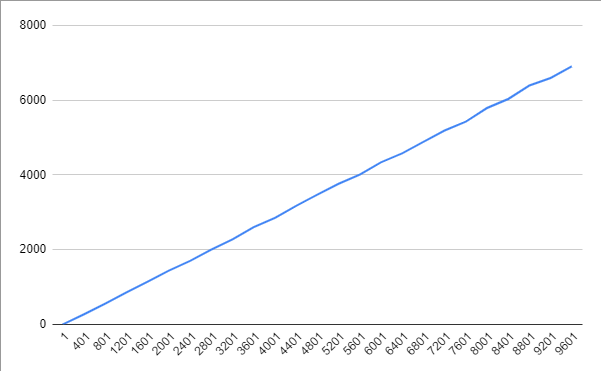

# **Nodos vs tiempo**

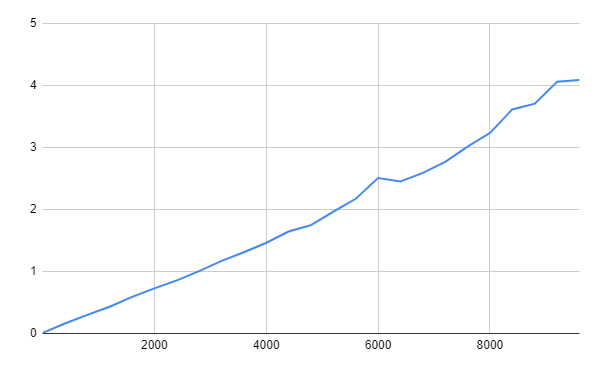

COMIENZA EL PROGRAMA
puntos:  [1, 401, 801, 1201, 1601, 2001, 2401, 2801, 3201, 3601, 4001, 4401, 4801, 5201, 5601, 6001, 6401, 6801, 7201, 7601, 8001, 8401, 8801, 9201, 9601]
distancia:  [0, 295.2944704900741, 603.9860512381449, 871.6290497874402, 1145.1026203962551, 1483.9140716893196, 1753.4849543322741, 2013.1484307114645, 2386.529160900456, 2653.728390575547, 2928.3329764133264, 3222.733695546184, 3508.872078956325, 3789.4405732976184, 4052.4169930335097, 4401.240945603635, 4654.246783444395, 4976.546292773346, 5233.941260743884, 5529.282991933465, 5833.49006074529, 6054.221402354054, 6391.727897909328, 6694.141850743638, 7024.486449474071]
Tiempo de ejecucion:  [8.559226989746094e-05, 0.0247647762298584, 0.06591057777404785, 0.1049041748046875, 0.14771318435668945, 0.16925692558288574, 0.22694754600524902, 0.2658843994140625, 0.33254408836364746, 0.360109806060791, 0.42178988456726074, 0.516437292098999, 0.5639352798461914, 0.6602230072021484, 0.7235581874847412, 0.79889154434204

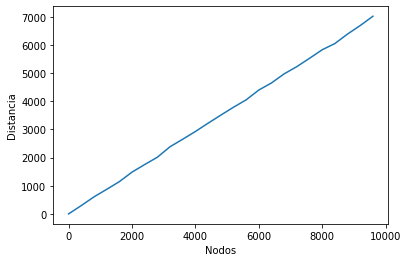

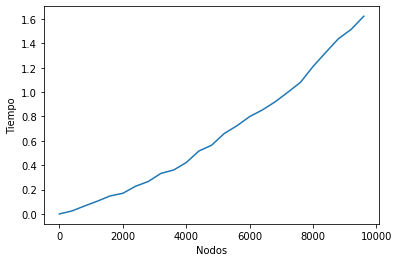

In [ ]:
def cal_camino(nodos,camino):
  dist=0
  for i in range(0,len(camino)-1):

    nodo_actual = nodos[camino[i]]
    nodo_siguiente = nodos[camino[i+1]]

    dist += math.sqrt((nodo_actual[0]-nodo_siguiente[0])**2 + (nodo_actual[1]-nodo_siguiente[1])**2)

  return dist

def rotar(camino, numRot):

  #print("Camino original:", camino)
  #print("Numero de rotaciones: ",numRot)
  for i in range(numRot):
    last = camino[-1]
    camino.insert(0,last)
    del camino[-1]

  #print("Vecino: ",camino)
  #print("---")
  return camino

  
# hill climbing local search algorithm
def hillclimbing(nodos,n_pop):
    # generate an initial point
    # generate a random point in the search space
    camino = range(0,len(nodos))
    pop=[]
    evals_de_sols = []
    for i in range(n_pop):
      pop.append(random.sample(camino,len(camino)))
      solution_eval = cal_camino(nodos,pop[i])
      evals_de_sols.append(solution_eval)

    for i in range(int(math.floor(math.log(len(nodos),2)))):

      numRot = int(math.floor(len(nodos)/(2**(i+1))))
      
      for j in range(n_pop):
        vecino = rotar(pop[j], numRot)  
         
        valor_vecino = cal_camino(nodos,vecino)
        if evals_de_sols[j]>valor_vecino:
          evals_de_sols[j] = valor_vecino
          pop[j] = vecino
          #print("NUEVO MEJOR: ", pop[j])



    M = max(evals_de_sols)  
    max_index = evals_de_sols.index(M)      
    return pop[max_index], M



print("COMIENZA EL PROGRAMA")

def genNodes(n):
  randomNodes = []
  for i in range(n):
    t = random.random()*2*math.pi
    r = random.random()
    randomNodes.append([r*math.sin(t),r*math.cos(t)])
  return randomNodes


n_pop = 10

#mejor_camino = HCTaller.hillclimbing(nodes,n_pop)

puntos_list=[]
distancia_list=[]
tiempo_list=[]
# perform the genetic algorithm search
for v in range (1, 10000, 400):
  nodes = genNodes(v)
  inicio =time.time()
  best, score = hillclimbing(nodes, n_pop)
  fin = time.time()
  tiempo = fin - inicio
  puntos_list.append(v)
  distancia_list.append(score)
  tiempo_list.append(tiempo)

print("puntos: ", puntos_list)
print("distancia: ", distancia_list)
print('Tiempo de ejecucion: ', tiempo_list)
plt.plot(puntos_list, distancia_list)
plt.ylabel('Distancia')
plt.xlabel('Nodos')
plt.show()

plt.plot(puntos_list, tiempo_list)
plt.ylabel('Tiempo')
plt.xlabel('Nodos')
plt.show()


COMIENZA EL PROGRAMA
puntos:  [1, 401, 801, 1201, 1601, 2001, 2401, 2801, 3201, 3601, 4001, 4401, 4801, 5201, 5601, 6001, 6401, 6801, 7201, 7601, 8001, 8401, 8801, 9201, 9601]
distancia:  [0, 300.1265457546758, 585.1783704937919, 900.7007907546595, 1171.3750788469504, 1439.5558260440055, 1742.0405788164214, 2031.3693260356279, 2347.9793880172997, 2642.0707964255325, 2947.416922762382, 3183.6944327455085, 3444.9647195304765, 3848.5117611296782, 4073.6805120629106, 4403.012633922246, 4662.4701303867, 4938.469036585953, 5237.494447718446, 5553.759378241979, 5820.548884489395, 6139.441310203962, 6428.839351835998, 6673.3373385329205, 7042.437632056374]
Tiempo de ejecucion:  [8.893013000488281e-05, 0.024833202362060547, 0.058051347732543945, 0.10175585746765137, 0.13393521308898926, 0.1685035228729248, 0.22924399375915527, 0.2963240146636963, 0.32871413230895996, 0.36939144134521484, 0.44023871421813965, 0.5020542144775391, 0.5742051601409912, 0.635246992111206, 0.7119803428649902, 0.762959

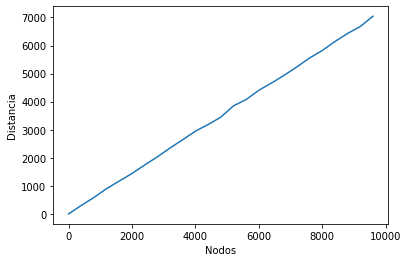

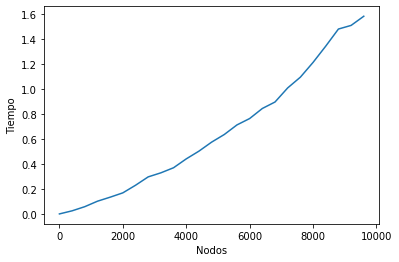

In [ ]:
def cal_camino(nodos,camino):
  dist=0
  for i in range(0,len(camino)-1):

    nodo_actual = nodos[camino[i]]
    nodo_siguiente = nodos[camino[i+1]]

    dist += math.sqrt((nodo_actual[0]-nodo_siguiente[0])**2 + (nodo_actual[1]-nodo_siguiente[1])**2)

  return dist

def rotar(camino, numRot):

  #print("Camino original:", camino)
  #print("Numero de rotaciones: ",numRot)
  for i in range(numRot):
    last = camino[-1]
    camino.insert(0,last)
    del camino[-1]

  #print("Vecino: ",camino)
  #print("---")
  #print("El camino rotado es: ", camino)
  return camino

  
# hill climbing local search algorithm
def simAnnealing(nodos,n_pop):
    # generate an initial point
    # generate a random point in the search space
    camino = range(0,len(nodos))
    pop=[]
    evals_de_sols = []
    for i in range(n_pop):
      pop.append(random.sample(camino,len(camino)))
      solution_eval = cal_camino(nodos,pop[i])
      evals_de_sols.append(solution_eval)

    for i in range(int(math.floor(math.log(len(nodos),2)))):

      numRot = int(math.floor(len(nodos)/(2**(i+1))))
      
      for j in range(n_pop):
        vecino = rotar(pop[j], numRot)  
         
        valor_vecino = cal_camino(nodos,vecino)
       
        if evals_de_sols[j]>valor_vecino:
          evals_de_sols[j] = valor_vecino
          pop[j] = vecino
          #print("El nuevo mejor camino por comparacion es: ", vecino)
        else:
          nrand = random.uniform(0, 1)
          delta_e = evals_de_sols[j] - valor_vecino
          prob = math.exp((-delta_e)/(i+1))
          if nrand < prob:
            evals_de_sols[j] = valor_vecino
            pop[j] = vecino
           #print("El nuevo peor camino por probabilidad es: ", vecino)

          #print("NUEVO MEJOR: ", pop[j])



    M = max(evals_de_sols)  
    max_index = evals_de_sols.index(M)      
    return pop[max_index], M

print("COMIENZA EL PROGRAMA")


# generate random nodes inside a circle
def genNodes(n):
  randomNodes = []
  for i in range(n):
    t = random.random()*2*math.pi
    r = random.random()
    randomNodes.append([r*math.sin(t),r*math.cos(t)])
  return randomNodes


n_pop = 10


puntos_list=[]
distancia_list=[]
tiempo_list=[]
# perform the genetic algorithm search
for v in range (1, 10000, 400):
  nodes = genNodes(v)
  inicio =time.time()
  best, score = simAnnealing(nodes, n_pop)
  fin = time.time()
  tiempo = fin - inicio
  puntos_list.append(v)
  distancia_list.append(score)
  tiempo_list.append(tiempo)

print("puntos: ", puntos_list)
print("distancia: ", distancia_list)
print('Tiempo de ejecucion: ', tiempo_list)
plt.plot(puntos_list, distancia_list)
plt.ylabel('Distancia')
plt.xlabel('Nodos')
plt.show()

plt.plot(puntos_list, tiempo_list)
plt.ylabel('Tiempo')
plt.xlabel('Nodos')
plt.show()